In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [7]:
def empirical_quantile(X_col, val):
    """经验 CDF: q = P(X <= val)"""
    return float(np.mean(X_col <= val))

def random_projection_pit(X, y, M=200, seed=42):
    """
    返回:
      q_d    : 各维度边缘 PIT 分位数 (D,)
      q_proj : 随机投影 PIT 分位数   (M,)
    """
    N, D = X.shape
    rng = np.random.default_rng(seed)

    # 边缘 PIT
    q_d = np.array([empirical_quantile(X[:, d], y[d]) for d in range(D)])

    # 随机投影 PIT
    U = rng.normal(size=(M, D))
    U /= np.linalg.norm(U, axis=1, keepdims=True) + 1e-12
    sX = X @ U.T          # (N, M)
    sy = y @ U.T           # (M,)
    q_proj = np.mean(sX <= sy[None, :], axis=0)

    return q_d, q_proj


def plot_scenario(ax_marg, ax_proj, q_d, q_proj, title, alpha=0.90):
    """在两个 axes 上画边缘 PIT 和投影 PIT 的直方图"""
    lo, hi = (1 - alpha) / 2, 1 - (1 - alpha) / 2

    for ax, q, label in [(ax_marg, q_d, "Marginal PIT  $q_d$"),
                          (ax_proj, q_proj, "Projection PIT  $q^{(m)}$")]:
        ax.hist(q, bins=20, range=(0, 1), color="#5B9BD5", edgecolor="white", alpha=0.85)
        ax.axvline(lo, color="red", ls="--", lw=1.2, label=f"{lo:.2f}")
        ax.axvline(hi, color="red", ls="--", lw=1.2, label=f"{hi:.2f}")
        ax.axvline(0.5, color="grey", ls=":", lw=1)
        ax.set_xlim(0, 1)
        ax.set_xlabel(label)
        ax.set_ylabel("count")

    # 计算统计量
    lo, hi = 0.05, 0.95
    C_m = np.mean((q_d >= lo) & (q_d <= hi))
    C_p = np.mean((q_proj >= lo) & (q_proj <= hi))
    T_m = np.mean(np.abs(q_d - 0.5))
    T_p = np.mean(np.abs(q_proj - 0.5))

    ax_marg.set_title(f"{title}\nMarginal: C={C_m:.2f}, T={T_m:.3f}", fontsize=10)
    ax_proj.set_title(f"Projection: C={C_p:.2f}, T={T_p:.3f}", fontsize=10)


In [3]:
N = 2000
D = 33


In [8]:
A = np.random.randn(D, D) * 0.5
Sigma = A @ A.T + np.eye(D) * 0.3   # 正定
mu = np.zeros(D)

X_ref = np.random.multivariate_normal(mu, Sigma, size=N)

In [12]:
X_ref.shape

(2000, 33)

In [9]:
# y 就是从同一分布中抽取的
y1 = np.random.multivariate_normal(mu, Sigma)

In [13]:
y1.shape

(33,)

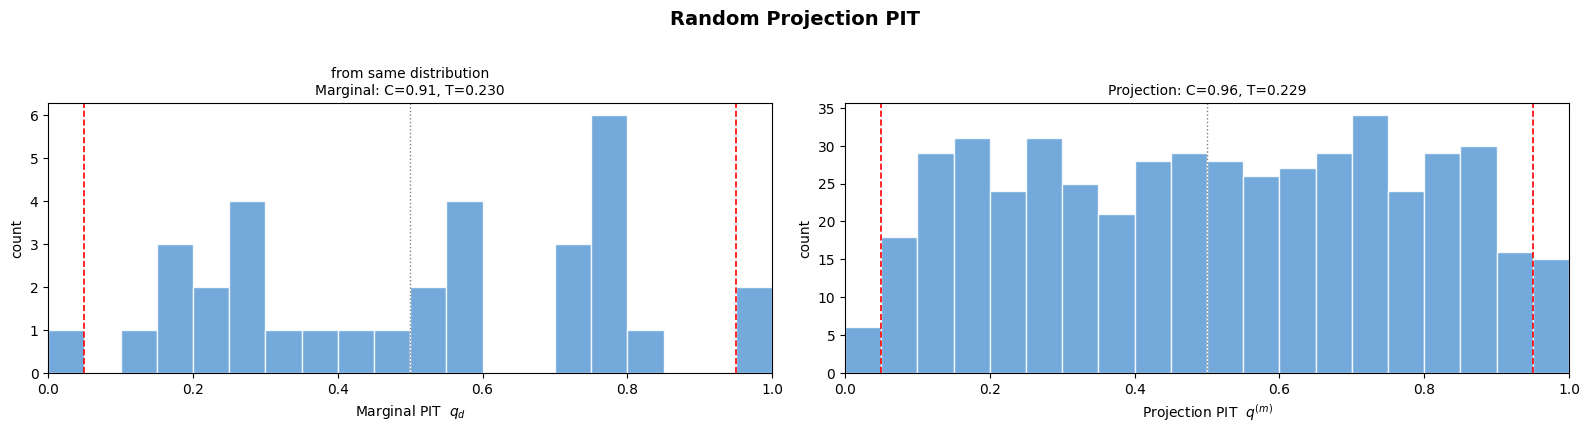

In [15]:
title1, y_vec1 = "from same distribution", y1

fig, (ax_m, ax_p) = plt.subplots(1, 2, figsize=(16, 4.2))
fig.suptitle("Random Projection PIT",
             fontsize=14, fontweight="bold", y=1.02)

q_d, q_proj = random_projection_pit(X_ref, y_vec1, M=500)
plot_scenario(ax_m, ax_p, q_d, q_proj, title1)

fig.tight_layout()
plt.show()

In [21]:
y3 = np.random.multivariate_normal(mu + 2.5, Sigma * 0.3)

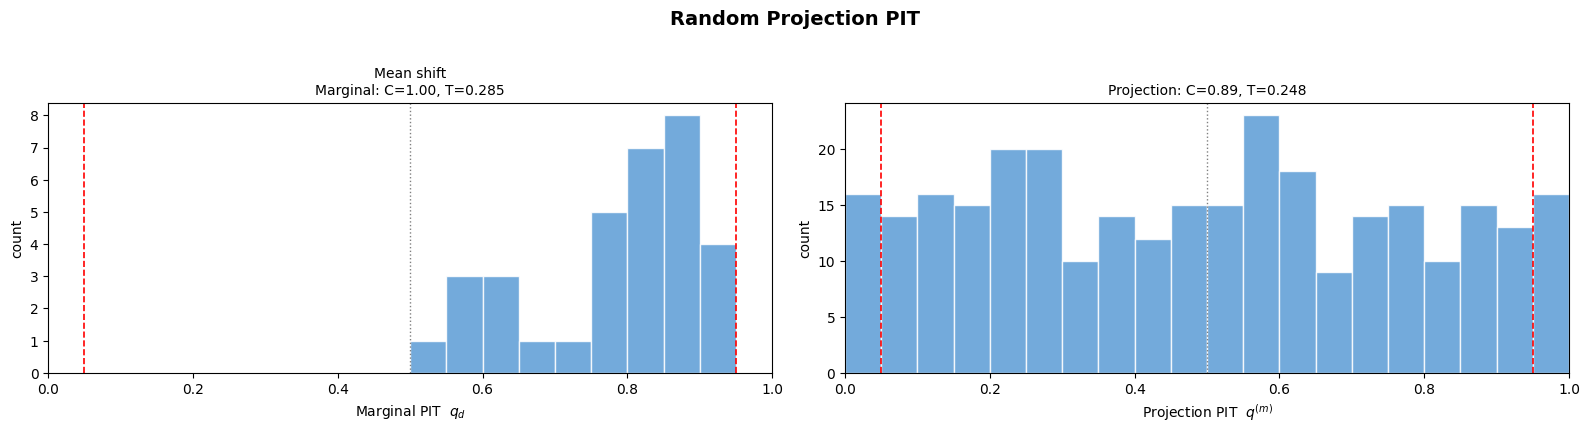

In [23]:
title1, y_vec1 = "Mean shift", y3

fig, (ax_m, ax_p) = plt.subplots(1, 2, figsize=(16, 4.2))
fig.suptitle("Random Projection PIT",
             fontsize=14, fontweight="bold", y=1.02)

q_d, q_proj = random_projection_pit(X_ref, y_vec1, M=300)
plot_scenario(ax_m, ax_p, q_d, q_proj, title1)

fig.tight_layout()
plt.show()

In [24]:
y4 = np.random.multivariate_normal(mu, Sigma)
y4[:3] = mu[:3] + 4 * np.sqrt(np.diag(Sigma)[:3])

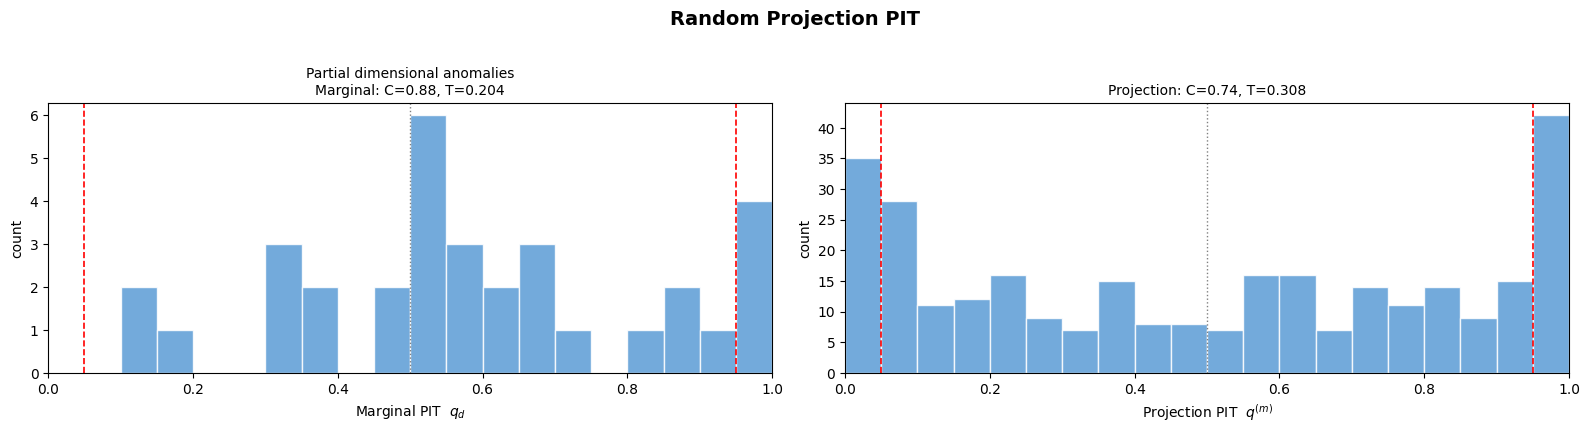

In [25]:
title1, y_vec1 = "Partial dimensional anomalies", y4

fig, (ax_m, ax_p) = plt.subplots(1, 2, figsize=(16, 4.2))
fig.suptitle("Random Projection PIT",
             fontsize=14, fontweight="bold", y=1.02)

q_d, q_proj = random_projection_pit(X_ref, y_vec1, M=300)
plot_scenario(ax_m, ax_p, q_d, q_proj, title1)

fig.tight_layout()
plt.show()